<center>
    <h1> Calculating and visualizing mesh quality</h1>
<div class="alert alert-success">
<h4>Geophysical Imaging and Montoring (GIM)<br> SoSe24</h4>
    
| Contact | Email   |
|----|---|
| Prof. Dr. Florian Wagner  | <fwagner@gim.rwth-aachen.de> |
</center>

In [1]:
import matplotlib.pyplot as plt
import pygimli as pg
import pygimli.meshtools as mt

Before we move to physical calculations on meshes (e.g., electrical fields), we will take some time to calculate and visualize mesh quality. At the end of this notebook we would like to have a function, which calculates a (or multiple) quality measure for a triangular mesh, which we can re-use later to calculate and visualize the quality of any given mesh.

<div class="alert alert-success">
    
### Exercise:

1. Create and visualize a simple triangular mesh with at least two regions.
2. Play with the `quality` and `area` parameters. How do they influence the mesh generation?
3. Define a function that returns a measure for the brilliance of your mesh, for example: 
    
$$\eta = \frac{4\sqrt{3}a}{l_1^2 + l_2^2 + l_3^2}$$
    
where $a$ is the size of the triangle and $l_1$-$l_3$ are its edge lengths. The factor $4\sqrt{3}$ ensures that a perfect triangle has a measure of $\eta=1$. Implement the function such that the input is a mesh and output is a vector containing your brilliance measure for each cell.
    
**Hint**:
You can get the area and edge lengths of a given `mesh` with:

```python
for cell in mesh.cells():
    area = cell.size()
    lengths = [cell.boundary(i).size() for i in range(cell.boundaryCount())]
```
</div>

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x12b27cd00>)

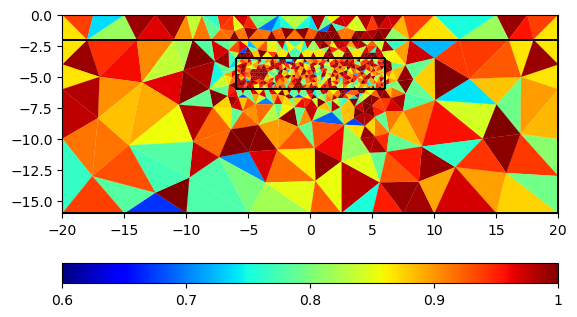

In [2]:
# Your solution here
world = mt.createWorld(start=[-20, 0], end=[20, -16], layers=[-2, -16]) # layers at 2 and 8 meter depth
block = mt.createRectangle(start=[-6, -3.5], end=[6, -6.0], marker=4,  boundaryMarker=10, area=0.1)
mesh = mt.createMesh(world + block, area=10, quality=30)
#pg.show(mesh)

import numpy as np
def MeshQuality(mesh):
    # Get cell areas and edges
    area = []
    lengths = []
    for cell in mesh.cells():
        area.append(cell.size())
        lengths.append([cell.boundary(i).size() for i in range(cell.boundaryCount())])
    
    # convert pygimli vectors to numpy arrays (needed to perform numpy calculations)
    a= np.array(area)
    l = np.array(lengths)
    return 4*a*np.sqrt(3) / (np.linalg.norm(l,axis=1)**2)

pg.show(mesh, data=MeshQuality(mesh), cMap='jet')